Выборка объема n = 25: [0.1529 1.0386 4.9361 0.1828 1.2034 1.495  5.3046 2.07   0.1062 3.09
 3.3356 1.5714 1.4374 0.8427 0.3137 0.1779 0.406  0.0668 1.1921 1.1581
 0.1321 1.1584 1.3888 2.5803 0.0931]
Мода: 0.0668
Медиана: 1.1584
Размах: 5.2378
Коэффициент ассиметрии: 1.3757245167233385


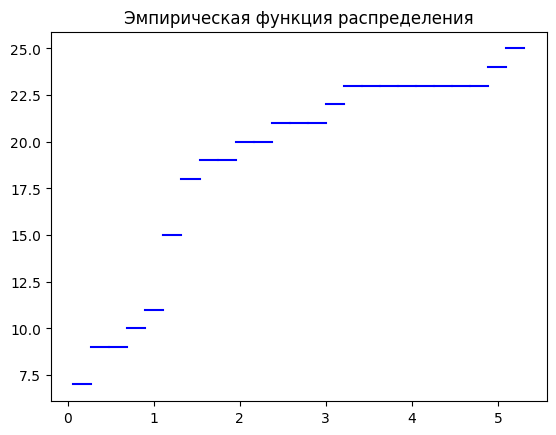

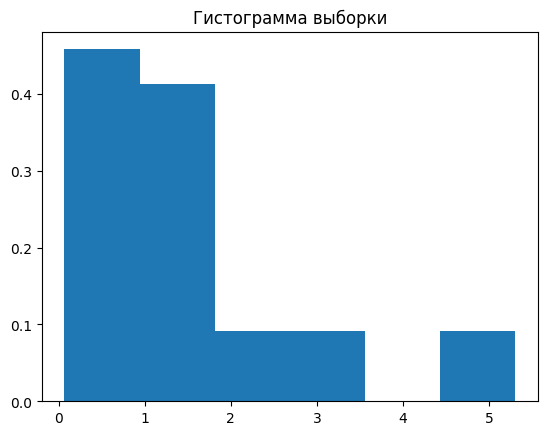

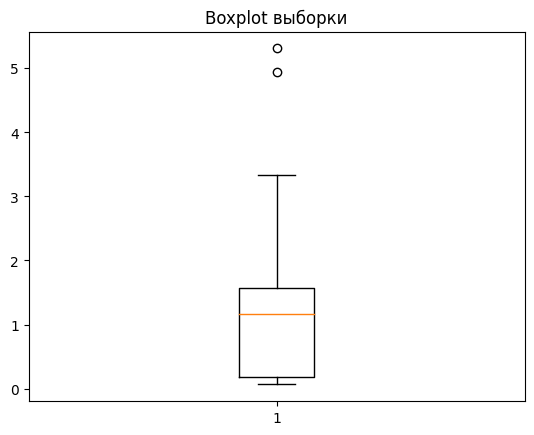

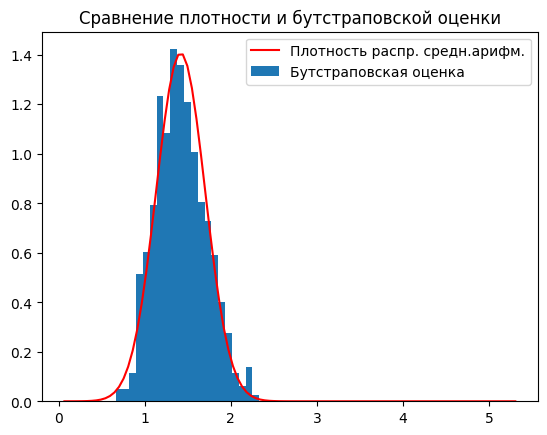

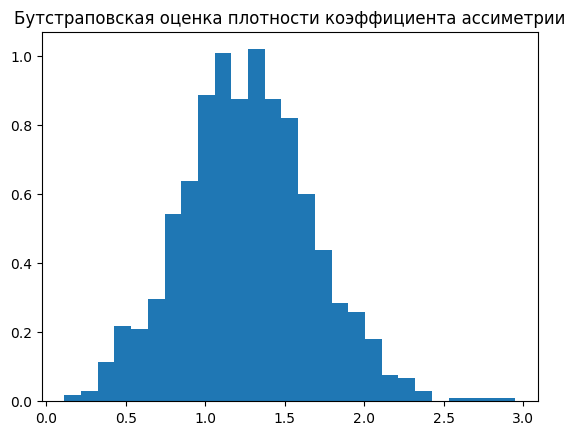

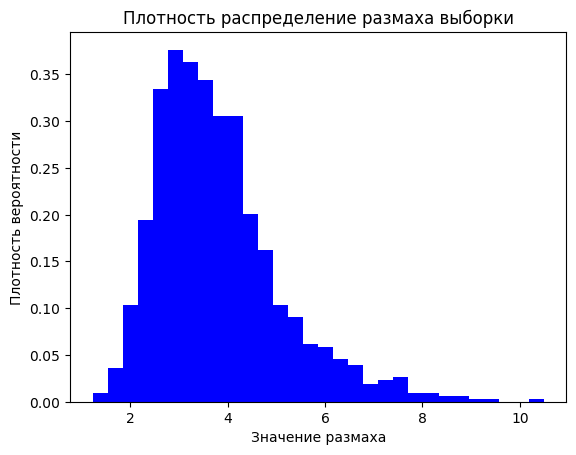

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Генерируем выборку объема n = 25 из экспоненциального распределения
n = 25
sample = np.around(np.random.exponential(scale=1, size=n), 4)

# Выводим выборку в виде массива
print(f"Выборка объема n = 25: {sample}")


# Мода
mode = stats.mode(sample)
# Медиана
median = np.median(sample)
# Размах
range_sample = np.ptp(sample)
# Коэффициент ассиметрии
kf = stats.skew(sample)

print(f"Мода: {mode[0]}")
print(f"Медиана: {median}")
print(f"Размах: {range_sample}")
print(f"Коэффициент ассиметрии: {kf}")

# Эмпирическая функция распределения
plt.figure()
bin_dt, bin_gr = np.histogram(sample, bins=len(sample))
Y = bin_dt.cumsum()
for i in range(len(Y)):
    plt.plot([bin_gr[i], bin_gr[i+1]],[Y[i], Y[i]],color='blue')
plt.title('Эмпирическая функция распределения')
plt.show()

# Гистограмма
plt.figure()
plt.hist(sample, bins='auto', density=True)
plt.title('Гистограмма выборки')
plt.show()

# Boxplot
plt.figure()
plt.boxplot(sample)
plt.title('Boxplot выборки')
plt.show()

# Плотность распределения среднего арифметического
# Определяем плотность нормального распределения для среднего арифметического элементов выборки, 
# используя среднее значение выборки и стандартную ошибку.
mean_density = stats.norm(np.mean(sample), np.std(sample)/np.sqrt(n)).pdf
#pdf - метод, используемый для вычисления значения плотности вероятности.

# Бутстраповская оценка плотности
from random import choice
def bootstrap(X, func):
    M = np.array([])
    for i in range(1000):
        x = np.random.choice(X, size = len(X))
        M = np.append(M, func(x))
    return M  

# Сравнение плотностей
x = np.linspace(min(sample), max(sample), 100)
plt.figure()
plt.plot(x, mean_density(x), label='Плотность распр. средн.арифм.', color='red')
plt.hist(bootstrap(sample, np.mean), bins='auto', density=True, label='Бутстраповская оценка')
plt.legend()
plt.title('Сравнение плотности и бутстраповской оценки')
plt.show()


# Построение графика бутстраповской оценки плотности распределения коэффициента ассиметрии
plt.figure()
plt.hist(bootstrap(sample, stats.skew), bins='auto', density=True, label='Бутстраповская оценка')
plt.title('Бутстраповская оценка плотности коэффициента ассиметрии')
plt.show()


# Генерируем много выборок
num_samples = 1000
sample_ranges = [np.ptp(np.random.exponential(scale=1, size=n)) for _ in range(num_samples)]

# Построение гистограммы плотности распределения размаха выборки
plt.figure()
plt.hist(sample_ranges, bins=30, density=True, color='blue')
plt.title('Плотность распределение размаха выборки')
plt.xlabel('Значение размаха')
plt.ylabel('Плотность вероятности')
plt.show()

